<a href="https://colab.research.google.com/github/disuja7/Bike-sharing-demand-prediction/blob/main/Copy_of_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [55]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
file_path = '/content/drive/MyDrive/DATA/SeoulBikeData.csv'

In [4]:
df = pd.read_csv(file_path,encoding="ISO-8859-1")

In [5]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [6]:
df.shape

(8760, 14)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

No null data present

In [8]:
df.describe(include='all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,No Holiday,Yes
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN
50%,NaN,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,NaN,NaN
75%,NaN,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,NaN,NaN


In [9]:
# checking for duplicate
len(df[df.duplicated()])

0

**Exploratory Data Analysis**

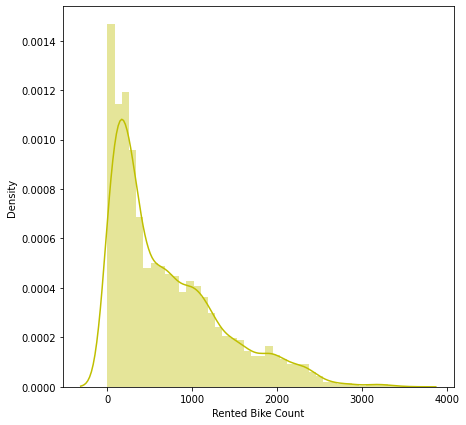

In [10]:
# Dependent variable 'Rented Bike Count'
plt.figure(figsize=(7,7))
sns.distplot(df['Rented Bike Count'],color="y")

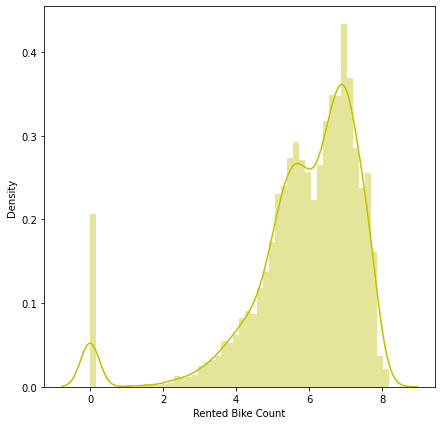

In [11]:
# Log transformation of dependent variable to get normal distribution
plt.figure(figsize=(7,7))
sns.distplot(np.log1p(df['Rented Bike Count']),color="y")

In [12]:
numerical_features = df.describe().columns
numerical_features

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

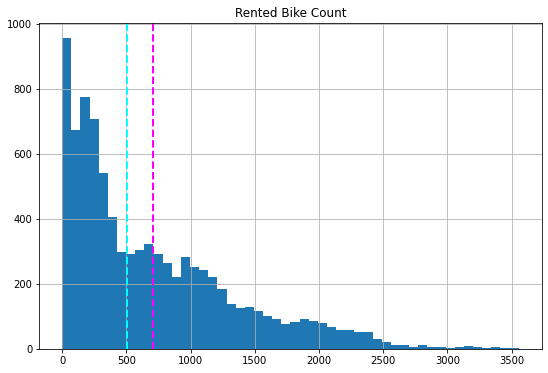

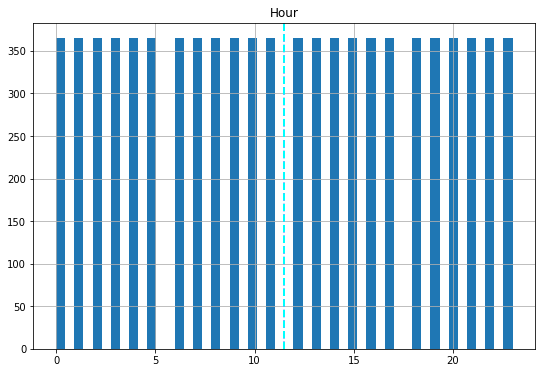

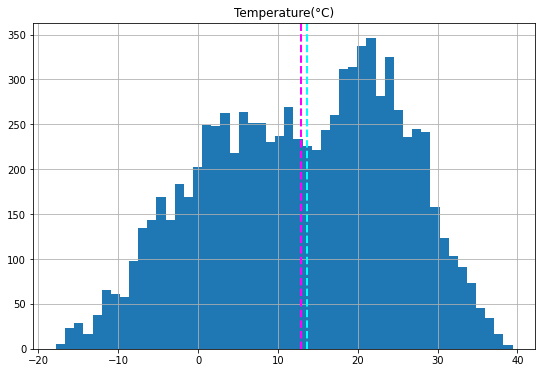

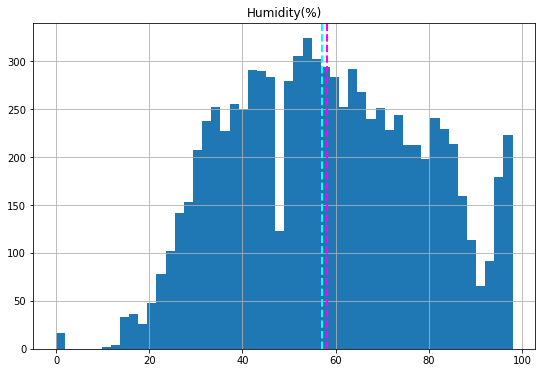

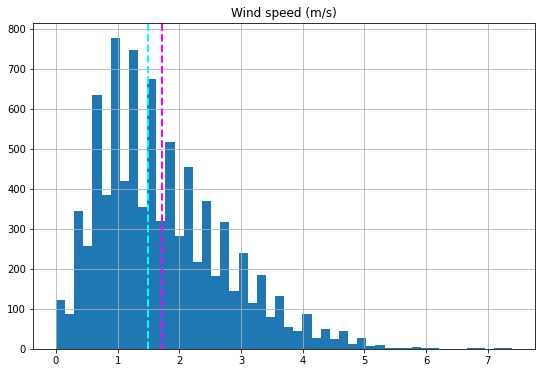

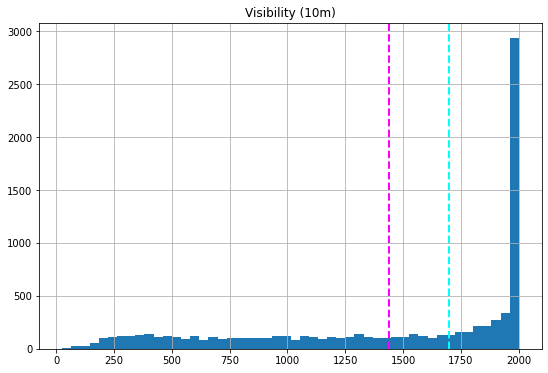

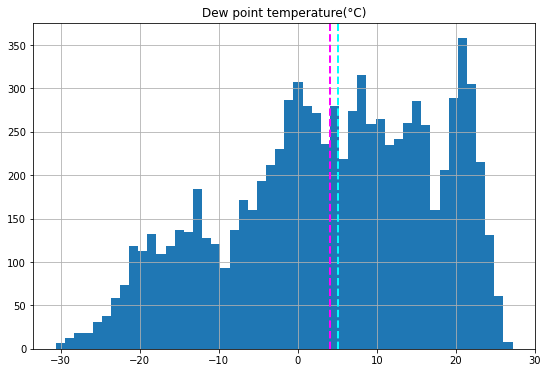

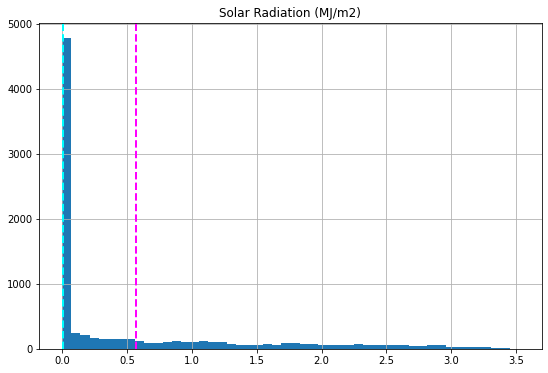

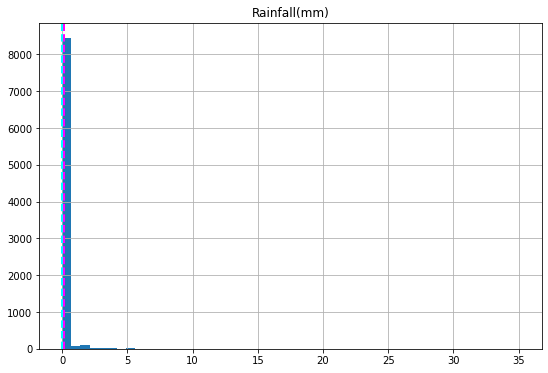

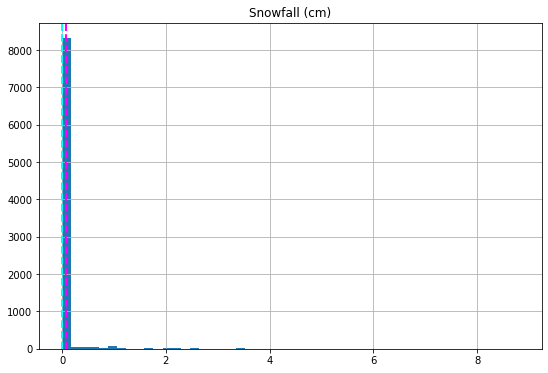

In [13]:
# ploting a bar plot for each numerical feature count

for col in numerical_features[0:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

Snowfall and Rainfall seems to be heavily skewed

In [14]:
categorical_features = df.describe(include=['object','category']).columns

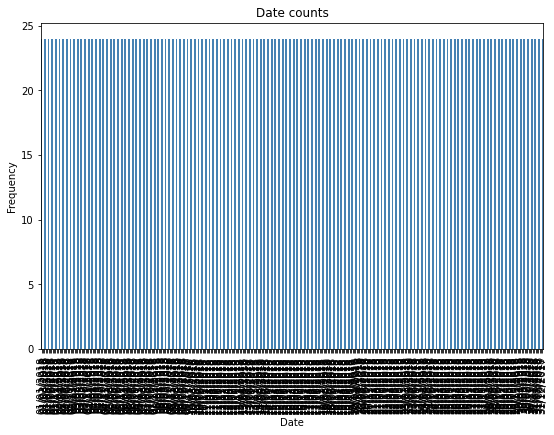

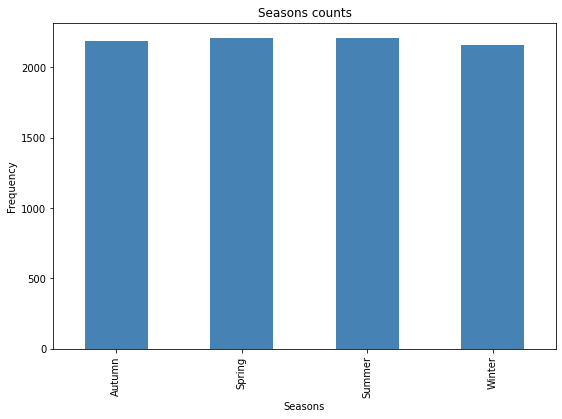

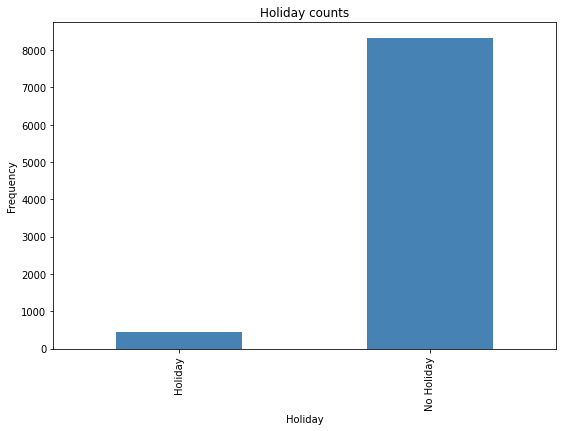

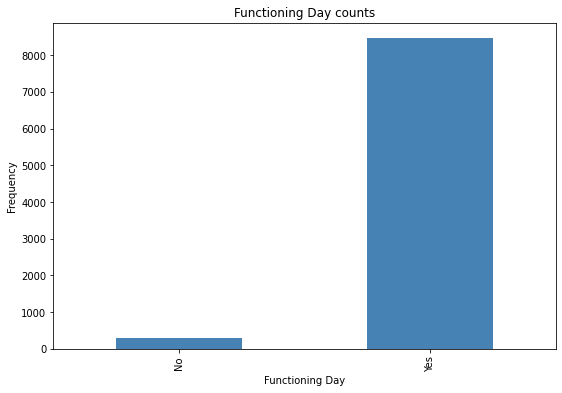

In [15]:
for col in categorical_features:
    counts = df[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

In [16]:
#Converting the Date column in Datetime Dtype
df['Date']=pd.to_datetime(df['Date'])

#Breaking Down the Date into 3 Components
df['WeekDay']=df['Date'].dt.day_name()
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year

In [17]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,WeekDay,Month,Year
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,1,2017
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,1,2017
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,1,2017
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,1,2017
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,1,2017


In [18]:
#Encoding the weekday to get numerical values
mapping_dictDay={'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}
df['WeekDayEncoding']=df['WeekDay'].map(mapping_dictDay)

In [19]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,WeekDay,Month,Year,WeekDayEncoding
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,1,2017,4
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,1,2017,4
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,1,2017,4
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,1,2017,4
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,1,2017,4


In [20]:
#Mapping the categorical variables to get numeric value
df['Functioning Day']=df['Functioning Day'].map({'Yes':1,'No':0})
df['Holiday']=df['Holiday'].map({'No Holiday':0,'Holiday':1})

In [21]:
new_df = df.copy()
new_df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,WeekDay,Month,Year,WeekDayEncoding
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0,1,Thursday,1,2017,4
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0,1,Thursday,1,2017,4
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,0,1,Thursday,1,2017,4
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,0,1,Thursday,1,2017,4
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,0,1,Thursday,1,2017,4


In [22]:
new_df.shape

(8760, 18)

In [23]:
#Dropping the unnecessary columns
new_df.drop(['Date','WeekDay'],axis=1,inplace=True)

In [24]:
new_df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Year,WeekDayEncoding
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,0,1,1,2017,4
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,0,1,1,2017,4
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,0,1,1,2017,4
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,0,1,1,2017,4
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,0,1,1,2017,4


In [25]:
new_df.describe(include='all')

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Month,Year,WeekDayEncoding
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spring,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,NaN,NaN,NaN,NaN,NaN
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,0.049315,0.966324,6.526027,2017.915068,4.021918
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,0.216537,0.180404,3.448048,0.278796,1.999994
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,1.000000,2017.000000,1.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,0.000000,1.000000,4.000000,2018.000000,2.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000,NaN,0.000000,1.000000,7.000000,2018.000000,4.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000,NaN,0.000000,1.000000,10.000000,2018.000000,6.000000


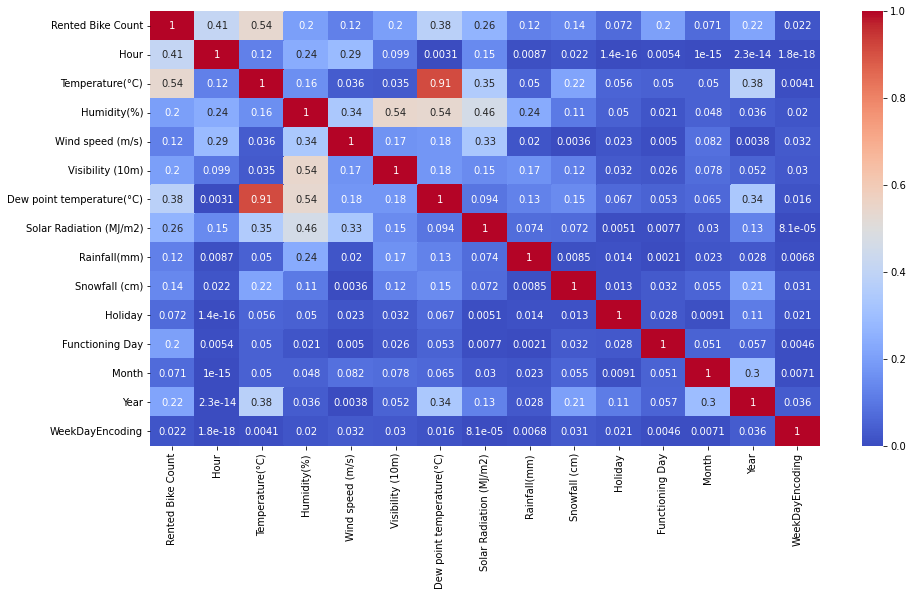

In [26]:
 ## Correlation
plt.figure(figsize=(15,8))
correlation = new_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')


In [27]:
### removing multicollear
new_df['Temperature_factor'] = 0.6*new_df['Temperature(°C)'] + 0.4*new_df['Dew point temperature(°C)']

In [28]:
# One hot encoding
new_df = pd.get_dummies(new_df, columns=["Seasons"])

In [29]:
new_df.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Month,Year,WeekDayEncoding,Temperature_factor,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,1,2017,4,-10.16,0,0,0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,1,2017,4,-10.34,0,0,0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,1,2017,4,-10.68,0,0,0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,1,1,2017,4,-10.76,0,0,0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,1,1,2017,4,-11.04,0,0,0,1


In [30]:
#Dropping the unnecessary columns
new_df.drop(['Temperature(°C)','Dew point temperature(°C)'],axis=1,inplace=True)

In [31]:
new_df.head()

,Rented Bike Count,Hour,Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Month,Year,WeekDayEncoding,Temperature_factor,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,254,0,37,2.2,2000,0.0,0.0,0.0,0,1,1,2017,4,-10.16,0,0,0,1
1,204,1,38,0.8,2000,0.0,0.0,0.0,0,1,1,2017,4,-10.34,0,0,0,1
2,173,2,39,1.0,2000,0.0,0.0,0.0,0,1,1,2017,4,-10.68,0,0,0,1
3,107,3,40,0.9,2000,0.0,0.0,0.0,0,1,1,2017,4,-10.76,0,0,0,1
4,78,4,36,2.3,2000,0.0,0.0,0.0,0,1,1,2017,4,-11.04,0,0,0,1


In [32]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rented Bike Count        8760 non-null   int64  
 1   Hour                     8760 non-null   int64  
 2   Humidity(%)              8760 non-null   int64  
 3   Wind speed (m/s)         8760 non-null   float64
 4   Visibility (10m)         8760 non-null   int64  
 5   Solar Radiation (MJ/m2)  8760 non-null   float64
 6   Rainfall(mm)             8760 non-null   float64
 7   Snowfall (cm)            8760 non-null   float64
 8   Holiday                  8760 non-null   int64  
 9   Functioning Day          8760 non-null   int64  
 10  Month                    8760 non-null   int64  
 11  Year                     8760 non-null   int64  
 12  WeekDayEncoding          8760 non-null   int64  
 13  Temperature_factor       8760 non-null   float64
 14  Seasons_Autumn          

In [33]:
def barplots(x,y,hue):
    plt.figure(figsize=(10,5))
    sns.barplot(x=x,y=y,hue=hue,data=df);

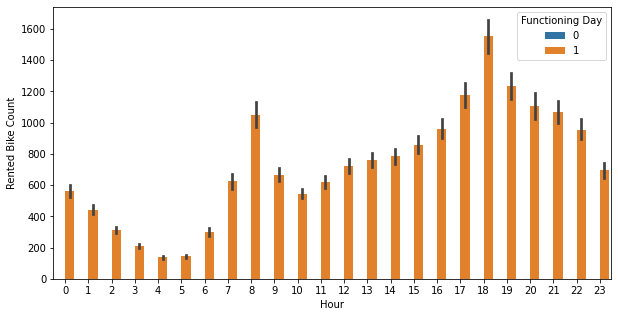

In [34]:
barplots('Hour','Rented Bike Count','Functioning Day')

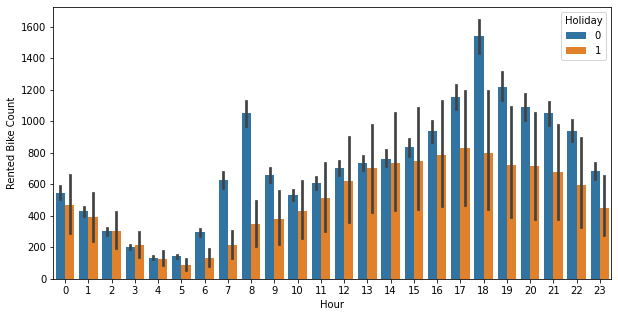

In [35]:
barplots('Hour','Rented Bike Count','Holiday')

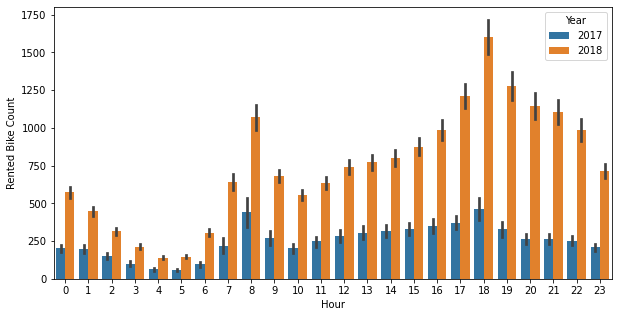

In [36]:
barplots('Hour','Rented Bike Count','Year')

As compared to 2017, there is an increase in the number of bikes rented in 2018

It can be clearly seen that for non functioning day there was no bike rented, So we can drop these rows.

In [37]:
new_df=new_df[new_df['Functioning Day']!=0]

In [39]:
new_df.head()

,Rented Bike Count,Hour,Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Month,Year,WeekDayEncoding,Temperature_factor,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,254,0,37,2.2,2000,0.0,0.0,0.0,0,1,1,2017,4,-10.16,0,0,0,1
1,204,1,38,0.8,2000,0.0,0.0,0.0,0,1,1,2017,4,-10.34,0,0,0,1
2,173,2,39,1.0,2000,0.0,0.0,0.0,0,1,1,2017,4,-10.68,0,0,0,1
3,107,3,40,0.9,2000,0.0,0.0,0.0,0,1,1,2017,4,-10.76,0,0,0,1
4,78,4,36,2.3,2000,0.0,0.0,0.0,0,1,1,2017,4,-11.04,0,0,0,1


As we have removed the rows containing Non functioning Day, all the other rows contains only Functioning Day. So there is no need to keep this feature.

In [45]:
new_df.drop(['Functioning Day'],axis=1,inplace=True)

In [46]:
new_df.shape

(8465, 17)

In [47]:
final_df = new_df.copy()

In [48]:
final_df.head()

,Rented Bike Count,Hour,Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Month,Year,WeekDayEncoding,Temperature_factor,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,254,0,37,2.2,2000,0.0,0.0,0.0,0,1,2017,4,-10.16,0,0,0,1
1,204,1,38,0.8,2000,0.0,0.0,0.0,0,1,2017,4,-10.34,0,0,0,1
2,173,2,39,1.0,2000,0.0,0.0,0.0,0,1,2017,4,-10.68,0,0,0,1
3,107,3,40,0.9,2000,0.0,0.0,0.0,0,1,2017,4,-10.76,0,0,0,1
4,78,4,36,2.3,2000,0.0,0.0,0.0,0,1,2017,4,-11.04,0,0,0,1


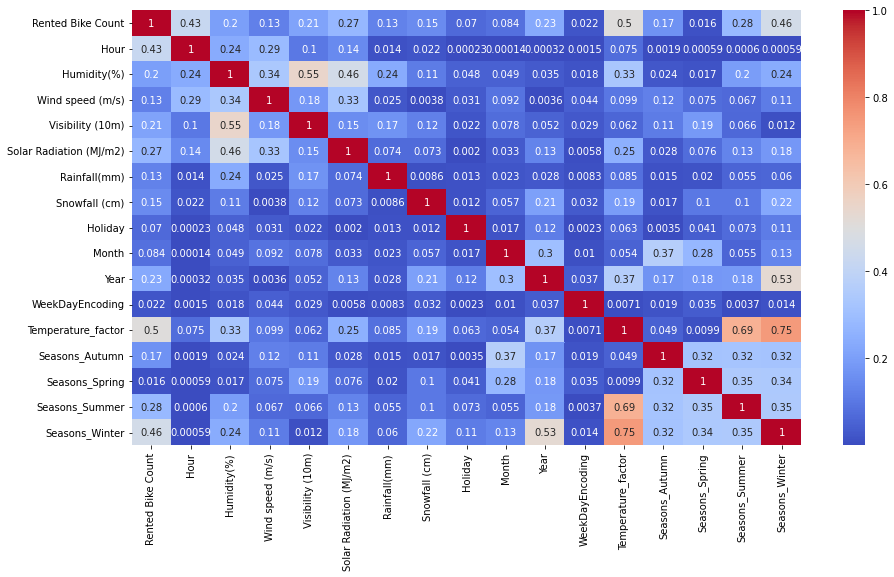

In [49]:
plt.figure(figsize=(15,8))
correlation = final_df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

It seems to be temperature is somewhat correlated with the seasons like - Summer and Winter. It is quite natural since temperature is a kind of property which defines a seasons.

In [50]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [51]:
calc_vif(final_df[[i for i in final_df.columns if i not in ['Rented Bike Count']]])

,variables,VIF
0,Hour,1.205086e+00
1,Humidity(%),2.940604e+00
2,Wind speed (m/s),1.304614e+00
3,Visibility (10m),1.697301e+00
4,Solar Radiation (MJ/m2),1.902104e+00
5,Rainfall(mm),1.073001e+00
6,Snowfall (cm),1.126831e+00
7,Holiday,1.030924e+00
8,Month,1.666569e+00
9,Year,1.914763e+00


From the above table we can conclude that our data has a very low collinearity.

In [136]:
X=final_df.drop('Rented Bike Count',axis=1)
y=np.log10(final_df['Rented Bike Count'])

In [145]:
def predict(ml_model,X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=12)
    sc=StandardScaler()
    X_train=sc.fit_transform(X_train)
    X_test=sc.transform(X_test)
    model=ml_model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    plt.scatter(y_pred,y_test,color='b')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    evaluation_metric=(f'R^2 is {r2_score(10**(y_test), 10**(y_pred))}\n Adj R^2 is {1-(1-r2_score(10**(y_test), 10**(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))}\n RMSE is: {np.sqrt(mean_squared_error(10**(y_test), 10**(y_pred)))}')
    print(evaluation_metric)


R^2 is 0.5047793029919467
 Adj R^2 is 0.5010061929195044
 RMSE is: 450.2592184802643


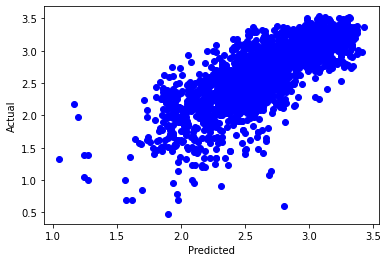

In [146]:
predict(LinearRegression(),X,y)

R^2 is 0.7804658095502944
 Adj R^2 is 0.778793168099249
 RMSE is: 299.7880403793051


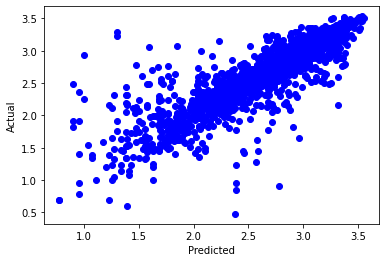

In [147]:
from sklearn.tree import DecisionTreeRegressor
predict(DecisionTreeRegressor(),X,y)

R^2 is 0.8981877994571872
 Adj R^2 is 0.8974120874530515
 RMSE is: 204.15646244859386


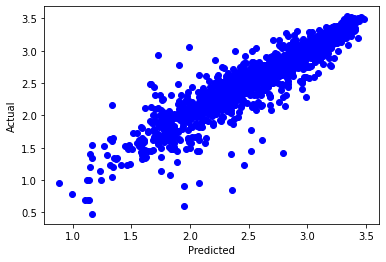

In [148]:
from sklearn.ensemble import RandomForestRegressor
predict(RandomForestRegressor(),X,y)